In [28]:
import numpy as np
import math
import matplotlib.pyplot as plt

# Stats and Data

## 3

In [29]:
bernoulli = np.random.binomial(1, 0.6, size=30)
bernoulli

array([1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 1, 1, 1, 1, 0])

In [30]:
print('p\u0302 is', sum(bernoulli)/30, "because a 1 shows up in",sum(bernoulli),"out of 30 trials")

p̂ is 0.8 because a 1 shows up in 24 out of 30 trials


This seems consistent with previous answers

## 7

In [31]:
print('p after one guess is', np.random.normal(0.4666666666666667,math.sqrt((0.4666666666666667 * (1-0.4666666666666667))/30)))

p after one guess is 0.4079994211936123


In [32]:
j = 0
for i in range(1000):
    j = j + np.random.normal(0.4666666666666667,math.sqrt((0.4666666666666667 * (1-0.4666666666666667))/30))
average = j/1000
print('The average p after 1000 guesses is ',average)

The average p after 1000 guesses is  0.464001184887117


# Regression Comparison

In [33]:
point = []
X1 = np.random.normal(3,1)
point.append(X1)
X2 = np.random.normal(-2,1)
point.append(X2)
X3 = X1 + (2 * X2)
point.append(X3)
X4 = math.pow((X2 + 2),2)
point.append(X4)
X5 = np.random.binomial(1, 0.8)
point.append(X5)
XD = np.random.normal(0,1)
print(point)


[1.493663036449464, -0.9221513849380014, -0.35063973342653876, 1.1617576369910685, 1]


**Generating Data Point and Y**

In [34]:
def generate_point(d):
    for i in range(d):
        if i == 0:
            point = []
            X1 = np.random.normal(3,1)
            point.append(X1)
        if i == 1:
            X2 = np.random.normal(-2,1)
            point.append(X2)
        if i == 2:
            X3 = X1 + (2 * X2)
            point.append(X3)
        if i == 3:
            X4 = math.pow((X2 + 2),2)
            point.append(X4)
        if i == 4:
            X5 = np.random.binomial(1, 0.8)
            point.append(X5)
        if i >= 5:
            XD = np.random.normal(0,1)
            point.append(XD)
    Y = 4 + (3 * math.pow(X1,2)) + X3 - (0.01 * X4) + (X2 * X5) + np.random.normal(0,0.1)
    return point,Y

**Training and Testing Data**

In [35]:
def generate_data(d,r):
    totalX = []
    totalY = []
    trainYerror = []
    for i in range(r):
        X, Y = generate_point(d)
        totalX.append(X)
        totalY.append(Y)
    return totalX, totalY

## 1

In [55]:
trainX,trainY = generate_data(5,10000)
testX,testY = generate_data(5,1000)

In [37]:
print('If I had to model Y as a constant value, the constant value would be',sum(trainY)/10000, 'as this is the average value of Y across the training data')

If I had to model Y as a constant value, the constant value would be 31.510992726770095 as this is the average value of Y across the training data


In [38]:
errorTrainC = 0
for i in range(10000):
    errorTrainC = errorTrainC + abs(((sum(trainY)/10000) - trainY[i]))
errorTrainC = errorTrainC/10000
print('The error for the best c on the training set is',errorTrainC)

The error for the best c on the training set is 15.391517819621551


In [39]:
errorTestC = 0
for i in range(1000):
    errorTestC = errorTestC + abs(((sum(trainY)/10000) - testY[i]))
errorTestC = errorTestC/1000
print('The error for the best c on the testing set is',errorTestC)

The error for the best c on the testing set is 15.236685560270214


In [40]:
print('The error for the best c on the testing set is',errorTestC - errorTrainC, "greater than that of the training set")

The error for the best c on the testing set is -0.1548322593513376 greater than that of the training set


The value of d does not matter. Because every X after X5 is a random variable surrounding 0, they will all average out to something close to 0. As a result, while having a larger d will increase the number of variables involved, it does not have an effect on the best c for the model.

## 2

**Variance of X**

In [41]:
def variance_X(r,X,data):
    v1 = 0
    v2 = 0
    for i in range(r):
        v1 = v1 + math.pow(data[i][X],2)
    v1 = v1/r
    for i in range(r):
        v2 = v2 + data[i][X]
    v2 = v2/r
    v2 = math.pow(v2,2)
    var = v1-v2
    return (var)

**Variance of Y**

In [42]:
def variance_Y(r,data):
    v1 = 0
    v2 = 0
    for i in range(r):
        v1 = v1 + math.pow(data[i],2)
    v1 = v1/r
    for i in range(r):
        v2 = v2 + data[i]
    v2 = v2/r
    v2 = math.pow(v2,2)
    var = v1-v2
    return (var)

**Covariance**

In [43]:
def covariance(r,X,dataY,dataX):
    v = 0
    x = 0
    y = 0
    for i in range(r):
        v = v + (dataX[i][X] * dataY[i])
    v = v/r
    for i in range(r):
        x = x + dataX[i][X]
    x = x/r
    for i in range(r):
        y = y + dataY[i]
    y = y/r
    covar = v - (x*y)
    return(covar)

**Correlation Coeffiecient**

In [44]:
def corr(r,X,dataY,dataX):
    cov = covariance(r,X,dataY,dataX)
    vX = variance_X(r,X,dataX)
    vY = variance_Y(r,dataY)
    if vX == 0:
        return np.nan
    else:
        corr = (cov)/np.sqrt(vX * vY)
        return(corr)

In [45]:
corr(1000,0,testY,testX)

0.966943919878975

**Finding ErrorLeft and ErrorRight**

In [46]:
def find_sideerror(array):
    mean = np.mean(array)
    sum = 0
    for i in range(len(array)):
        sum = sum + math.pow((array[i]-mean),2)
    return sum

**Find Total Error**

In [47]:
def find_error(midpoint, array, Y,x):
    left = []
    right = []
    for i in range(len(array)):
        if array[i,x] > midpoint:
            right.append(Y[i])
        elif array[i,x] <= midpoint:
            left.append(Y[i])
    leftError = find_sideerror(left)
    rightError = find_sideerror(right)
    Lerror = (len(left)/len(array)) * leftError
    Rerror = (len(right)/len(array)) * rightError
    error = Lerror + Rerror
    return error

**Find Alpha**

In [48]:
def find_alpha(array,x,size,Y):
    array = np.array(array)
    newArray = array[np.argsort(array[:,x])]
    j = 0
    k = 1
    errors = []
    
    while k < size:
        midpoint = (newArray[j,x] + newArray[k,x])/2
        err = find_error(midpoint,array,Y,x)
        errors.append(err)
        if err == min(errors):
            alpha = j
        j = j+1
        k = k+1
    return newArray[alpha,x]

In [49]:
alpha = find_alpha(testX,0,1000,testY)
print(alpha)

3.282449572283641


**Decision Tree**

In [50]:
def decision(array,Y,depths,averageYs,lowers,uppers,d,depth):
    array = np.array(array)
    Y = np.array(Y)
    if len(array) <= 1:
        return 
    else:
        corrs = []
        for i in range(d):
            correl = corr(len(array),i,Y,array)
            corrs.append(abs(correl))

        #print(len(array))
        #print(corrs)
        X_index = np.nanargmax(corrs)

        alpha = find_alpha(array,X_index,len(array),Y)

        
        depth = depth + 1
        lower = min(array[:,X_index])
        upper = max(array[:,X_index])
        averageY = np.mean(Y)
        
        averageYs.append(averageY)
        lowers.append(lower)
        uppers.append(upper)
        depths.append(int(depth))
        Xs1.append(int(X_index))
        
        leftArray = []
        leftY = []
        rightArray = []
        rightY = []
        for j in range(len(array)):

            if array[j,X_index] > alpha:
                rightArray.append(array[j,:])
                rightY.append(Y[j])
            elif  array[j,X_index] <= alpha:
                leftArray.append(array[j,:])
                leftY.append(Y[j])
        
        
        decision(rightArray,rightY,depths,averageYs,lowers,uppers,d,depth)
        decision(leftArray,leftY,depths,averageYs,lowers,uppers,d,depth)
        
    return depths,averageYs,lowers,uppers,Xs1

**Making the Decision Tree**

In [51]:
trainX2 = np.array(trainX2)
trainY2 = np.array(trainY2)



errorDepth = [0] * max(depths)
multi = np.array(multi)
multi = multi[multi[:,0].argsort()]
error = [0] * len(trainX2)
used = [0] * len(trainX2)
for i in range(len(depths)):
    depth = int(multi[i][0])
    averageY = multi[i][1]
    lower = multi[i][2]
    upper = multi[i][3]
    X = int(multi[i][4])
    j = 0
    for j in range(len(trainX2)):
        if (trainX2[j,X] > lower) & (trainX2[j,X] < upper):
            error[j] = (abs(np.mean(trainY2[j]) - averageY))
            used[j] = 1
    if i != (len(depths)):
        if multi[i+1,0] > multi[i,0]:
            errorDepth[depth] = sum(error)/len(trainX2)
            

NameError: name 'trainX2' is not defined

**Testing on Training Data**

In [56]:
trainX2,trainY2 = generate_data(10,10000)
trainX2 = np.array(trainX2)
trainY2 = np.array(trainY2)
averageYs = []
lowers = []
uppers = []
depths = []
Xs1 = []
depths,averageYs,lowers,uppers,Xs1 = decision(trainX2,trainY2,depths,averageYs,lowers,uppers,10,-1)
depths = np.array(depths)
averageYs = np.array(averageYs)
lowers = np.array(lowers)
uppers = np.array(uppers)
Xs1 = np.array(Xs1)
multi = []
for i in range(len(depths)):
    multi.append([depths[i],averageYs[i],lowers[i],uppers[i],Xs1[i]])


**Error by Depth**

In [33]:
errorDepth

NameError: name 'errorDepth' is not defined

**Plot of errors as tree gets deeper on training data**

In [32]:
plt.plot([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16],errorDepth)

NameError: name 'errorDepth' is not defined

It appears that the optimal depth to grow the tree to minimize error without overfitting is 4 layers

**Testing on Testing Data**

In [128]:
testX2,testY2 = generate_data(10,1000)
testX2 = np.array(testX2)
testY2 = np.array(testY2)


errorDepth = [0] * max(depths)
multi = np.array(multi)
multi = multi[multi[:,0].argsort()]
error = [0] * len(trainX2)
for i in range(len(depths)):
    depth = int(multi[i][0])
    averageY = multi[i][1]
    lower = multi[i][2]
    upper = multi[i][3]
    X = int(multi[i][4])
    
    j = 0
    for j in range(len(testX2)):
        if (testX2[j,X] > lower) & (testX2[j,X] < upper):
            error[j] = abs(np.mean(testY2[j]) - averageY)
    if i != (len(depths)-1):
        if multi[i+1,0] > multi[i,0]:
            errorDepth[depth] = sum(error)/len(testX2)

In [129]:
errorDepth

[15.027458455578113,
 8.706599706413245,
 5.307234439333707,
 17.776403151235826,
 17.46928286067314,
 16.11013407951249,
 30.432072731105354,
 21.99944316932064,
 74.36682386617208,
 17.935655165081357,
 54.77029876930076,
 23.07074392971401,
 17.363575399843455,
 23.172244970499197,
 16.69200049897784,
 15.554136932020732,
 16.494629291726707]

**Plot of errors as tree gets deeper on testing data**

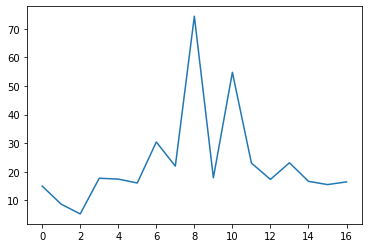

In [130]:
plt.plot([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16],errorDepth)

In [248]:
errorDepth

[15.027458455578113,
 8.706599706413245,
 5.307234439333707,
 17.776403151235826,
 17.46928286067314,
 16.11013407951249,
 30.432072731105354,
 21.99944316932064,
 74.36682386617208,
 17.935655165081357,
 54.77029876930076,
 23.07074392971401,
 17.363575399843455,
 23.172244970499197,
 16.69200049897784,
 15.554136932020732,
 16.494629291726707]

## 3

**Decision Tree but for Size**

In [35]:
def decision_size(array,Y,depths,averageYs,lowers,uppers,d):
    array = np.array(array)
    Y = np.array(Y)
    if len(array) <= 1:
        return 
    else:
        corrs = []
        for i in range(d):
            correl = corr(len(array),i,Y,array)
            corrs.append(abs(correl))

        X_index = np.nanargmax(corrs)

        alpha = find_alpha(array,X_index,len(array),Y)

        
        size = len(array) #altered from the depth decision tree
        lower = min(array[:,X_index])
        upper = max(array[:,X_index])
        averageY = np.mean(Y)
        
        averageYs.append(averageY)
        lowers.append(lower)
        uppers.append(upper)
        depths.append(int(size)) #altered from the depth decision tree
        Xs2.append(int(X_index))
        
        leftArray = []
        leftY = []
        rightArray = []
        rightY = []
        for j in range(len(array)):

            if array[j,X_index] > alpha:
                rightArray.append(array[j,:])
                rightY.append(Y[j])
            elif  array[j,X_index] <= alpha:
                leftArray.append(array[j,:])
                leftY.append(Y[j])
        
        
        decision_size(rightArray,rightY,depths,averageYs,lowers,uppers,d)
        decision_size(leftArray,leftY,depths,averageYs,lowers,uppers,d)
        
    return depths,averageYs,lowers,uppers,Xs2

**Train the Data**

In [230]:
trainX2 = np.array(trainX2)
trainY2 = np.array(trainY2)

averageYs = []
lowers = []
uppers = []
depths = []
Xs2 = []
sizes,averageYs,lowers,uppers,Xs2 = decision_size(trainX2,trainY2,depths,averageYs,lowers,uppers,10)
sizes = np.array(sizes)
averageYs = np.array(averageYs)
lowers = np.array(lowers)
uppers = np.array(uppers)
Xs2 = np.array(Xs2)
multi = []
for i in range(len(sizes)):
    multi.append([sizes[i],averageYs[i],lowers[i],uppers[i],Xs2[i]])

**Test the Training Data**

In [241]:
errorSize = []
sizeAmount = []
error = [0] * len(trainX2)
multi = np.array(multi)
multi = -multi[multi[:,0].argsort()]
multi = multi[multi[:,0].argsort()]
multi = -multi
for i in range(len(sizes)):
    size = int(multi[i][0])
    averageY = multi[i][1]
    lower = multi[i][2]
    upper = multi[i][3]
    X = int(multi[i][4])
    j = 0
    for j in range(len(trainX2)):
        if (trainX2[j,X] > lower) & (trainX2[j,X] < upper):
            error[j] = abs(np.mean(trainY2[j]) - averageY)
    if i != (len(sizes)-1):
        if multi[i+1,0] < multi[i,0]:
            errorSize.append(sum(error)/len(trainX2)) 
            sizeAmount.append(size)

**Plot of errors as depending on minimum size of end tree node**

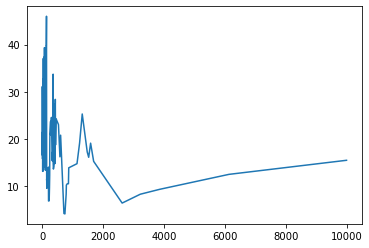

In [242]:
plt.plot(sizeAmount,errorSize)

**Test the Testing Data**

In [243]:
testX2 = np.array(testX2)
testY2 = np.array(testY2)

errorSize2 = []
sizeAmount2 = []
error = [0] * len(testX2)
for i in range(len(sizes)):
    size = int(multi[i][0])
    averageY = multi[i][1]
    lower = multi[i][2]
    upper = multi[i][3]
    X = int(multi[i][4])
    j = 0
    for j in range(len(testX2)):
        if (testX2[j,X] > lower) & (testX2[j,X] < upper):
            error[j] = abs(np.mean(testY2[j]) - averageY)
    if i != (len(sizes)-1):
        if multi[i+1,0] < multi[i,0]:
            errorSize2.append(sum(error)/len(testX2)) 
            sizeAmount2.append(size)

**Plot of errors as depending on minimum size of end tree node**

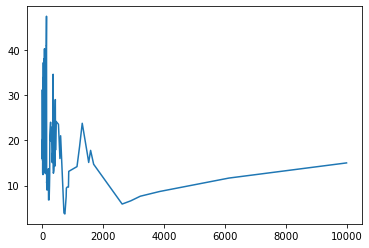

In [244]:
plt.plot(sizeAmount2,errorSize2)

## 5

**Testing d=50 on depth tree**

In [266]:
trainX3,trainY3 = generate_data(50,10000)
trainX3 = np.array(trainX3)
trainY3 = np.array(trainY3)
averageYs = []
lowers = []
uppers = []
depths = []
Xs1 = []
depths,averageYs,lowers,uppers,Xs1 = decision(trainX3,trainY3,depths,averageYs,lowers,uppers,10,-1)
depths = np.array(depths)
averageYs = np.array(averageYs)
lowers = np.array(lowers)
uppers = np.array(uppers)
Xs1 = np.array(Xs1)
multi = []
for i in range(len(depths)):
    multi.append([depths[i],averageYs[i],lowers[i],uppers[i],Xs1[i]])


In [267]:
trainX3 = np.array(trainX3)
trainY3 = np.array(trainY3)



errorDepth = [0] * max(depths)
multi = np.array(multi)
multi = multi[multi[:,0].argsort()]
error = [0] * len(trainX3)
used = [0] * len(trainX3)
for i in range(len(depths)):
    depth = int(multi[i][0])
    averageY = multi[i][1]
    lower = multi[i][2]
    upper = multi[i][3]
    X = int(multi[i][4])
    j = 0
    for j in range(len(trainX3)):
        if (trainX3[j,X] > lower) & (trainX3[j,X] < upper):
            error[j] = (abs(np.mean(trainY3[j]) - averageY))
            used[j] = 1
    if i != (len(depths)-1):
        if multi[i+1,0] > multi[i,0]:
            errorDepth[depth] = sum(error)/len(trainX3)
            

In [268]:
errorDepth

[15.667047079456658,
 9.32503863149727,
 5.548339315141327,
 13.79589597227179,
 6.788602791284981,
 23.57220324382126,
 27.27848383481501,
 40.84388632092503,
 63.57021601894419,
 23.510965254405548,
 41.14918723106142,
 21.834357982273993,
 16.317524629753414,
 23.278506978100438,
 18.751204127328883,
 16.47175595636096,
 17.05268737860871,
 17.596742482432944]

**Testing d=50 on size tree**

In [269]:
trainX3 = np.array(trainX3)
trainY3 = np.array(trainY3)

averageYs = []
lowers = []
uppers = []
depths = []
Xs2 = []
sizes,averageYs,lowers,uppers,Xs2 = decision_size(trainX3,trainY3,depths,averageYs,lowers,uppers,10)
sizes = np.array(sizes)
averageYs = np.array(averageYs)
lowers = np.array(lowers)
uppers = np.array(uppers)
Xs2 = np.array(Xs2)
multi = []
for i in range(len(sizes)):
    multi.append([sizes[i],averageYs[i],lowers[i],uppers[i],Xs2[i]])

**Test the Training Data**

In [270]:
errorSize = []
sizeAmount = []
error = [0] * len(trainX3)
multi = np.array(multi)
multi = -multi[multi[:,0].argsort()]
multi = multi[multi[:,0].argsort()]
multi = -multi
for i in range(len(sizes)):
    size = int(multi[i][0])
    averageY = multi[i][1]
    lower = multi[i][2]
    upper = multi[i][3]
    X = int(multi[i][4])
    j = 0
    for j in range(len(trainX3)):
        if (trainX3[j,X] > lower) & (trainX3[j,X] < upper):
            error[j] = abs(np.mean(trainY3[j]) - averageY)
    if i != (len(sizes)-1):
        if multi[i+1,0] < multi[i,0]:
            errorSize.append(sum(error)/len(trainX3)) 
            sizeAmount.append(size)

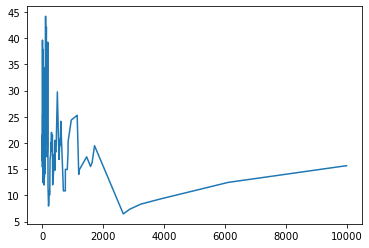

In [271]:
plt.plot(sizeAmount,errorSize)

## 6

**Test Different d values in depth tree**

In [284]:
unneccesaryAmount = []
for k in range(5,20):
    unnec = 0
    testX6,testY6 = generate_data(k,1000)
    testX6 = np.array(testX6)
    testY6 = np.array(testY6)
    averageYs = []
    lowers = []
    uppers = []
    depths = []
    Xs1 = []
    depths,averageYs,lowers,uppers,Xs6 = decision(testX6,testY6,depths,averageYs,lowers,uppers,k,-1)
    for i in Xs6:
        if Xs6[i] >= 5:
            unnec = unnec + 1
    unneccesaryAmount.append(unnec)

In [285]:
unneccesaryAmount

[0, 0, 0, 92, 82, 134, 122, 238, 198, 0, 85, 256, 203, 258, 345]

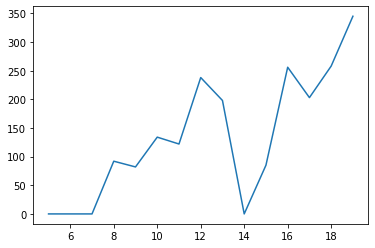

In [286]:
plt.plot(range(5,20),unneccesaryAmount)

**Test Different d values in size tree**

In [289]:
unneccesaryAmount = []
for k in range(5,20):
    unnec = 0
    testX6,testY6 = generate_data(k,1000)
    testX6 = np.array(testX6)
    testY6 = np.array(testY6)
    averageYs = []
    lowers = []
    uppers = []
    depths = []
    Xs2 = []
    depths,averageYs,lowers,uppers,Xs6 = decision_size(testX6,testY6,depths,averageYs,lowers,uppers,k)
    for i in Xs6:
        if Xs6[i] >= 5:
            unnec = unnec + 1
    unneccesaryAmount.append(unnec)

In [290]:
unneccesaryAmount

[0, 0, 0, 88, 0, 197, 121, 248, 204, 210, 180, 309, 239, 291, 291]

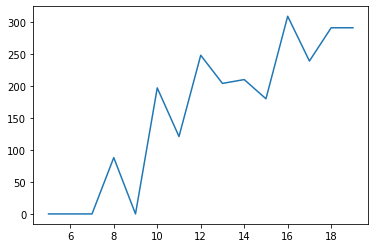

In [291]:
plt.plot(range(5,20),unneccesaryAmount)

## 7

**INCOMPLETE**

In [394]:
wMatrix = [0 for x in range(6)]
wMatrix[0] = [4,-3,1,-0.01,1]
for t in range(6):
    if t == 5:
        continue
    wMatrix[t+1] = wMatrix[t] - 0.01 * (np.transpose(trainX).dot(trainX) * (wMatrix[t])) - np.transpose(trainX).dot(trainY)

In [395]:
wMatrix

[[4, -3, 1, -0.01, 1],
 array([[-1136570.05085082,   598354.27069795,    67938.64964713,
          -313114.73649358,  -248953.1557656 ],
        [-1130170.71793603,   601649.61843206,    67341.58438642,
          -313119.72418134,  -248553.37685785],
        [-1131773.79578528,   601347.77486702,    67142.04396746,
          -313118.7049488 ,  -248634.34598212],
        [-1133770.22952903,   599557.59806378,    67836.38673368,
          -313114.60827827,  -248792.76700204],
        [-1133530.34153282,   599674.6516723 ,    67818.32299373,
          -313116.9401012 ,  -248792.8217496 ]]),
 array([[ 1.13464341e+09,  3.59930973e+08,  1.36393280e+07,
          9.34165309e+07,  5.93442029e+07],
        [-6.79836122e+08, -2.98971635e+08, -2.66872638e+07,
         -6.27563177e+07, -4.01178913e+07],
        [-2.27218446e+08, -2.38317023e+08, -4.00055374e+07,
         -3.08420372e+07, -1.99991739e+07],
        [ 3.38257027e+08,  1.20165588e+08,  6.68175318e+06,
          9.74311011e+07,  1.9402

In [393]:
np.transpose(trainX[t]) *(trainY)

ValueError: operands could not be broadcast together with shapes (5,) (10000,) 

In [31]:
len(trainX2)

10000